# 2.1 Classifying with distance measurements

In [2]:
'''
Created on 2025-05-07
kNN: k-Nearest Neighbors algorithm

Input:      inX: vector to compare to existing dataset (1xN)
            dataSet: size m data set of known vectors (NxM)
            labels: data set labels (1xM vector)
            k: number of neighbors to use for comparison (should be an odd number)
            
Output:     the most popular class label

@author:      Felix
'''

# -*- coding: utf-8 -*-
import numpy as np
import operator
import matplotlib.pyplot as plt

### 2.1.1 Prepare: importing data with Python

In [3]:
'''
@brief Classify the input vector using the kNN algorithm.
'''
def  createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

### 2.1.2 Putting the kNN classification algorithm into action

In [4]:
'''
@param inX: input vector to classify (1xN)
@param dataSet: training dataset (NxM)
@param labels: labels for the training dataset (1xM vector)
@param k: number of nearest neighbors to consider (should be an odd number)
'''
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]  # Get the number of rows in the dataset
    
    # Calculate the Euclidean distance between the input vector and each row in the dataset
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet  # Create a matrix of differences
    sqDiffMat = diffMat ** 2  # Square the differences
    sqDistances = sqDiffMat.sum(axis=1)  # Sum the squared differences along the rows
    distances = sqDistances ** 0.5  # Take the square root to get the Euclidean distance
    sortedDistIndicies = distances.argsort()  # Sort the distances and get the indices of the sorted order
    
    # Yoting with lowest k distances
    classCount = {}  # Initialize an empty dictionary to store class counts
    for i in range(k):  # Loop over
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
        
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)  # Sort the class counts in descending order
    return sortedClassCount[0][0]  # Return the class with the highest count
    

In [5]:
# main function to test the kNN algorithm
if __name__ == '__main__':
    group, labels = createDataSet()
    print("Dataset:")
    for i, data in enumerate(group):
        formatted_data = ["{:.1f}".format(value) for value in data]
        print("  Data Point {}: {}".format(i + 1, formatted_data))
    print("Labels:")
    for i, label in enumerate(labels):
        print("  Label {}: {}".format(i + 1, label))
        
    test_classify_result = classify0([0, 0], group, labels, 3)  # Test the classify0 function with a sample input vector
    print("The classifier came back with: %s, the real answer is: B" % test_classify_result)  # Print the classification result

Dataset:
  Data Point 1: ['1.0', '1.1']
  Data Point 2: ['1.0', '1.0']
  Data Point 3: ['0.0', '0.0']
  Data Point 4: ['0.0', '0.1']
Labels:
  Label 1: A
  Label 2: A
  Label 3: B
  Label 4: B
The classifier came back with: B, the real answer is: B


# 2.2 Example: improving matches from a dating site with kNN

### 2.2.1 Prepare: parsing data from a text file

In [23]:
def file2matrix(filename):
    """
    Convert a text file to a matrix of features and labels.
    
    Parameters:
    filename (str): The name of the file to read.
    
    Returns:
    tuple: A tuple containing the feature matrix (Numpy array) and label vector (Numpy array).
    """
    fr = open(filename)
    arrayOfLines = fr.readlines()
    returnMat = [] # Initialize an empty list to hold the feature matrix
    classLabelVector = [] # Initialize an empty list to hold the labels
    
    for line in arrayOfLines:
        line = line.strip() # Remove leading/trailing whitespace
        listFromLine = line.split('\t') # Split the line into a list using tab as delimiter
        returnMat.append([float(x) for x in listFromLine[:-1]]) # Append features to the matrix
        classLabelVector.append(int(listFromLine[-1])) # Append label to the vector
    
    return np.array(returnMat), np.array(classLabelVector)

datingDataMat, datingLabels = file2matrix('../datingTestSet2.txt') # Load the dataset
print("Dataset loaded successfully.")
print("Feature matrix shape:", datingDataMat.shape) # Print the shape of the feature matrix
print("Label vector shape:", datingLabels.shape) # Print the shape of the label vector

Dataset loaded successfully.
Feature matrix shape: (1000, 3)
Label vector shape: (1000,)


### 2.2.2 Analyze: creating scatter plots with Matplotlib

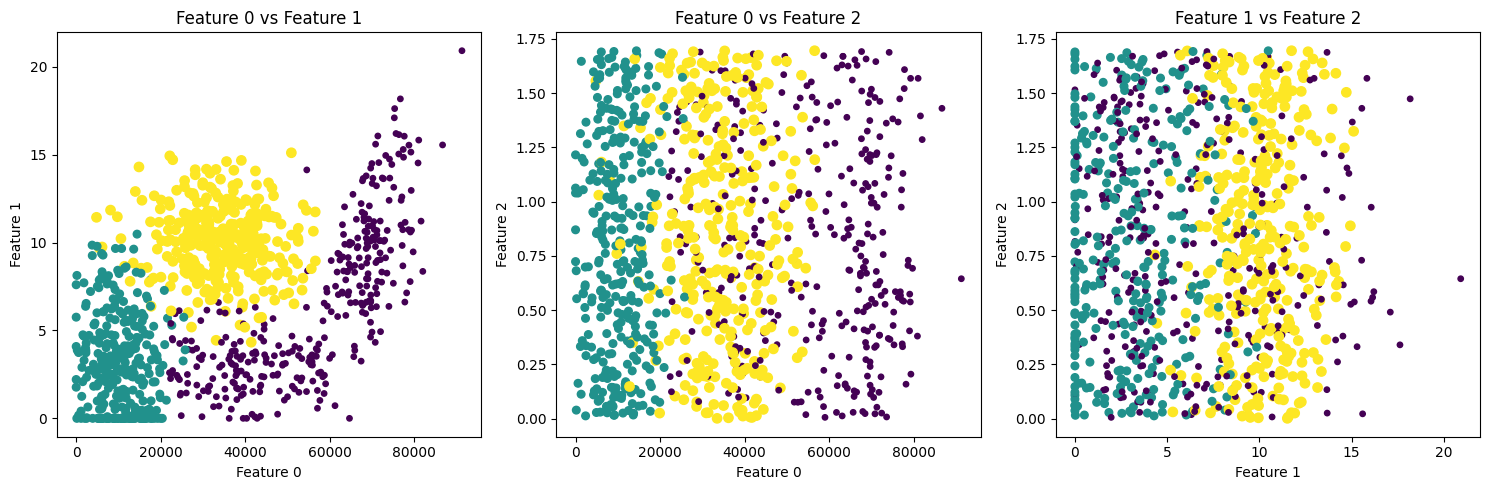

In [24]:
fig = plt.figure(figsize=(15, 5))  # Create a new figure with a specified size

# Subplot 1: Feature 0 vs Feature 1
ax1 = fig.add_subplot(131)  # Add the first subplot (1 row, 3 columns, position 1)
ax1.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 15.0 * datingLabels, 15.0 * datingLabels)
ax1.set_xlabel('Feature 0')
ax1.set_ylabel('Feature 1')
ax1.set_title('Feature 0 vs Feature 1')

# Subplot 2: Feature 0 vs Feature 2
ax2 = fig.add_subplot(132)  # Add the second subplot (1 row, 3 columns, position 2)
ax2.scatter(datingDataMat[:, 0], datingDataMat[:, 2], 15.0 * datingLabels, 15.0 * datingLabels)
ax2.set_xlabel('Feature 0')
ax2.set_ylabel('Feature 2')
ax2.set_title('Feature 0 vs Feature 2')

# Subplot 3: Feature 1 vs Feature 2
ax3 = fig.add_subplot(133)  # Add the third subplot (1 row, 3 columns, position 3)
ax3.scatter(datingDataMat[:, 1], datingDataMat[:, 2], 15.0 * datingLabels, 15.0 * datingLabels)
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_title('Feature 1 vs Feature 2')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Show the plot

### 2.2.3 Prepare: normalizing numeric values

In [25]:
def autoNorm(dataSet):
    """
    Normalize the dataset to a range of [0, 1].
    
    Parameters:
    dataSet (Numpy array): The dataset to normalize.
    
    Returns:
    tuple: A tuple containing the normalized dataset and the ranges for each feature.
    """
    minVals = dataSet.min(0) # Get the minimum values for each feature
    maxVals = dataSet.max(0) # Get the maximum values for each feature
    ranges = maxVals - minVals # Calculate the range for each feature
    normDataSet = np.zeros(np.shape(dataSet)) # Initialize a matrix of zeros with the same shape as the dataset
    
    m = dataSet.shape[0] # Get the number of rows in the dataset
    normDataSet = dataSet - np.tile(minVals, (m, 1)) # Subtract the minimum values from each row
    normDataSet = normDataSet / np.tile(ranges, (m, 1)) # Divide by the ranges to normalize
    
    return normDataSet, ranges, minVals

normMat, ranges, minVals = autoNorm(datingDataMat) # Normalize the dataset
print("Normalized dataset:")
print(normMat) # Print the normalized dataset

Normalized dataset:
[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


### 2.2.4 Test: testing the classifier as a whole program

In [29]:
def datingClassTest():
    """
    Test the kNN algorithm on the dating dataset.
    
    Returns:
    None
    """
    hoRatio = 0.10 # Holdout ratio for training/testing split
    datingDataMat, datingLabels = file2matrix('../datingTestSet2.txt') # Load the dataset
    normMat, ranges, minVals = autoNorm(datingDataMat) # Normalize the dataset
    
    m = normMat.shape[0] # Get the number of rows in the normalized dataset
    numTestVecs = int(m * hoRatio) # Calculate the number of test vectors
    
    errorCount = 0.0 # Initialize error count
    for i in range(numTestVecs): # Loop over test vectors
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3) # Classify the test vector
        print("The classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i])) # Print results
        if (classifierResult != datingLabels[i]): # Check if classification was correct
            errorCount += 1.0 # Increment error count
    
    print("The total error rate is: %f" % (errorCount / float(numTestVecs))) # Print total error rate
    
datingClassTest() # Run the dating class test

The classifier came back with: 3, the real answer is: 3
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answe